## **Project Name:-** Sentiment Analysis of Real-time Flipkart Product Reviews

### **Project Summary:-**

This project focuses on analyzing 8,518 real-time product reviews from Flipkart for the "YONEX MAVIS 350 Nylon Shuttle" product. The objective is to classify reviews as positive or negative, identify pain points in negative reviews, and gain insights into product features affecting customer satisfaction. Key steps include data preprocessing, sentiment analysis, pain point identification, and insights generation. The outcome aims to provide actionable insights for improving product quality and customer satisfaction based on customer feedback.

#### **Problem Statement:-**

This project aims to classify Flipkart reviews of 'YONEX MAVIS 350 Nylon Shuttle' as positive or negative to identify customer pain points and understand satisfaction-driving features.

### **Objective:-**

The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.

### **Know Your Data**

In [39]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
# load dataset

df = pd.read_csv(r"C:\Users\nishk\Downloads\reviews_data_dump\reviews_badminton\data.csv")

In [41]:
# dataset first look
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [42]:
df.tail()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [43]:
df.sample(5)

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
4603,Chandu B,Worth the money,"Certified Buyer, Hyderabad",0.0,0.0,Feb 2020,NiceREAD MORE,5
4400,Anuj Agarwal,Worth the money,"Certified Buyer, Lakhimpur",0.0,0.0,May 2020,NiceREAD MORE,3
1708,Sarath Kumar.D.S,Horrible,"Certified Buyer, Krishnagiri",0.0,0.0,Aug 2021,Waste of moneyREAD MORE,1
4040,vanavada venkata siva kumar,Super!,"Certified Buyer, Hyderabad",0.0,0.0,Jul 2020,GoodREAD MORE,3
7336,Flipkart Customer,Very poor,"Certified Buyer, Pune",0.0,0.0,Apr 2018,nice dealREAD MORE,5


In [44]:
# dataset rows and column counts
df.shape

(8518, 8)

In [45]:
# creating a new dataframe for preprocessing the data
senti_data = pd.DataFrame()

In [46]:
# function to label encoding the targets [1,2] as negative 3 as neutral and [4,5] as positive
def emo_label(data):
    if data in [1,2]:
        return 'Negative'
    elif data==3:
        return 'Neutral'
    else:
        return 'Positive'

In [47]:
# dataframe for review_text and label encoded emotions
senti_data['review_text'] = df['Review Title'] + ' ' + df['Review text']
senti_data['emotion'] = df['Ratings'].apply(emo_label)


In [48]:
# after view of data
senti_data

,review_text,emotion
0,"Nice product Nice product, good quality, but p...",Positive
1,Don't waste your money They didn't supplied Yo...,Negative
2,Did not meet expectations Worst product. Damag...,Negative
3,"Fair Quite O. K. , but nowadays the quality o...",Neutral
4,Over priced Over pricedJust â?¹620 ..from reta...,Negative
...,...,...
8513,NaN,Positive
8514,NaN,Negative
8515,NaN,Positive
8516,NaN,Negative


In [49]:
# removing the missing values from data
senti_data.dropna(inplace=True)

In [50]:
# data after removing missing values
senti_data

,review_text,emotion
0,"Nice product Nice product, good quality, but p...",Positive
1,Don't waste your money They didn't supplied Yo...,Negative
2,Did not meet expectations Worst product. Damag...,Negative
3,"Fair Quite O. K. , but nowadays the quality o...",Neutral
4,Over priced Over pricedJust â?¹620 ..from reta...,Negative
...,...,...
8503,Yones Mavis 350 Blue cap Wrost and duplicate p...,Negative
8504,For Mavis350 Received product intact and seale...,Positive
8505,Very Good Delivered before time but price is h...,Neutral
8506,Don't waste your money up to the mark but same...,Positive


In [51]:
# creating datafrae named text to store only review_text for preprocessing
text = pd.DataFrame(data = senti_data['review_text'], columns=['review_text'])

In [52]:
text

,review_text
0,"Nice product Nice product, good quality, but p..."
1,Don't waste your money They didn't supplied Yo...
2,Did not meet expectations Worst product. Damag...
3,"Fair Quite O. K. , but nowadays the quality o..."
4,Over priced Over pricedJust â?¹620 ..from reta...
...,...
8503,Yones Mavis 350 Blue cap Wrost and duplicate p...
8504,For Mavis350 Received product intact and seale...
8505,Very Good Delivered before time but price is h...
8506,Don't waste your money up to the mark but same...


In [53]:
# function to remove 'READ MORE'
def read_more(data):
    data = data.replace('READ MORE','')
    return data


# function to normalize data
def normalization(data):
    return data.lower()


# function to replace emojis with its meaning text
import emoji
def remove_emoji(data):
    x=''
    for i in data:
        if emoji.is_emoji(i):
            x=x+' '+ emoji.demojize(i)
        else:
            x=x+i
    return x.strip()


# function to remove punctuation
from string import punctuation
def remove_punctuation(data):
    return ''.join([i for i in data if i not in punctuation])


# function to remove digits
def remove_digit(data):
    x=''
    for i in data:
        if i.isdigit() == False:
            x = x + i
    return x


# function to autocorrect text spellings
from autocorrect import Speller
def auto_correction(data):
    spell=Speller(lang='en')
    return spell(data)


# function to fixing contraction
import contractions
def contraction_fixing(data):
    return contractions.fix(data)


# function to remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

swl=stopwords.words('english')
swl.remove('no')
swl.remove('not')
swl.remove('nor')

def remove_stopwords(data):
    return ' '.join([i for i in data.split() if i.lower() not in swl])


# funtion to fixing accented text
from unidecode import unidecode
def accented_fixing(data):
    return unidecode(data)


# function to stemming the text
from nltk.stem import PorterStemmer
def stemming(data):
    stemmer = PorterStemmer()

    x=''
    for i in data.split():
        x = x +' ' + stemmer.stem(i)
    return x.strip()


# function to tokenize the text
nltk.download('punkt')
def tokenization(data):
    tokens = nltk.word_tokenize(data)
    return tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nishk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nishk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
# removing the 'READ MORE' from each row
text['clean_data'] = text['review_text'].apply(read_more)

# normalizing the data i.e converting it to lower case
text['clean_data'] = text['clean_data'].apply(normalization)

# converting emojis to its meaning in text
text['clean_data'] = text['clean_data'].apply(remove_emoji)

# removing the punctuation
text['clean_data'] = text['clean_data'].apply(remove_punctuation)

# removing the digits
text['clean_data'] = text['clean_data'].apply(remove_digit)

# fixing the accented words
text['clean_data'] = text['clean_data'].apply(accented_fixing)

In [55]:
# autocorrecting the words
from tqdm import tqdm

tqdm.pandas(desc="Auto-correcting text")
text['clean_data'] = text['clean_data'].progress_apply(auto_correction)

Auto-correcting text: 100%|██████████| 8508/8508 [17:15<00:00,  8.21it/s]  


In [56]:
# fixing the contraction 
text['clean_data'] = text['clean_data'].apply(contraction_fixing)

# removing stopwords
text['clean_data'] = text['clean_data'].apply(remove_stopwords)

# stemming the text
text['clean_data'] = text['clean_data'].apply(stemming)

# tokenizing the text
text['clean_data'] = text['clean_data'].apply(tokenization)

In [57]:
# data sample
text.loc[145:155]

,review_text,clean_data
145,Could be way better Old one onlyREAD MORE,"[could, way, better, old, one]"
146,Perfect product! Super ballREAD MORE,"[perfect, product, super, ball]"
147,Must buy! According to cost it's average lifeR...,"[must, buy, accord, cost, averag, life]"
148,Slightly disappointed So worstREAD MORE,"[slightli, disappoint, worst]"
149,Not recommended at all 👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎...,"[not, recommend, thumbsdown, thumbsdown, thumb..."
150,Did not meet expectations Quality not good ...,"[not, meet, expect, qualiti, not, good, broken..."
151,Not good Nice product but damage in 1 daysREAD...,"[not, good, nice, product, damag, day]"
152,Useless product Not good at all this is the wo...,"[useless, product, not, good, worst, product, ..."
153,Absolute rubbish! Low quality. Not durabalityR...,"[absolut, rubbish, low, qualiti, not, durabl]"
154,Hated it! BadlyREAD MORE,"[hate, badli]"


In [58]:
# converting list text into string
text['clean_data'] = text['clean_data'].apply(lambda x : ' '.join(x))

In [59]:
# data sample
text.loc[145:155]

,review_text,clean_data
145,Could be way better Old one onlyREAD MORE,could way better old one
146,Perfect product! Super ballREAD MORE,perfect product super ball
147,Must buy! According to cost it's average lifeR...,must buy accord cost averag life
148,Slightly disappointed So worstREAD MORE,slightli disappoint worst
149,Not recommended at all 👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎...,not recommend thumbsdown thumbsdown thumbsdown...
150,Did not meet expectations Quality not good ...,not meet expect qualiti not good broken match
151,Not good Nice product but damage in 1 daysREAD...,not good nice product damag day
152,Useless product Not good at all this is the wo...,useless product not good worst product bought ...
153,Absolute rubbish! Low quality. Not durabalityR...,absolut rubbish low qualiti not durabl
154,Hated it! BadlyREAD MORE,hate badli


In [60]:
# applying tfidf vectorization to the text
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()

tfidf_data = tfidf_vec.fit_transform(text['clean_data']).A
tfidf_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
# taking out features name and applying the labels to the vectorized data
tfidf_df=pd.DataFrame(tfidf_data,columns=tfidf_vec.get_feature_names_out())
tfidf_df

,aa,aaa,abl,aboutdelieveryflipkart,aboveaverag,absenc,absmag,absolut,accept,accord,...,yet,yo,yonexdoesnt,yonexit,yonexsatisfi,yonexxx,youtub,yr,zero,zippermouthfac
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# creating a separate dataframe for target
target = senti_data.drop('review_text',axis=1)
target

,emotion
0,Positive
1,Negative
2,Negative
3,Neutral
4,Negative
...,...
8503,Negative
8504,Positive
8505,Neutral
8506,Positive


In [63]:
# label ncoding the target
labels = {'Neutral':0, 'Negative':1, 'Positive':2}
target['emotion'].replace(labels, inplace=True)
target

C:\Users\nishk\AppData\Local\Temp\ipykernel_10892\3819212531.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  target['emotion'].replace(labels, inplace=True)
C:\Users\nishk\AppData\Local\Temp\ipykernel_10892\3819212531.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target['emotion'].replace(

,emotion
0,2
1,1
2,1
3,0
4,1
...,...
8503,1
8504,2
8505,0
8506,2


In [64]:
# importing libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [65]:
# splitting the training data to 80% and testing data to 20% 
x_train,x_test,y_train,y_test = train_test_split(tfidf_df,target,test_size = 0.2, random_state = 7, stratify= target)

In [66]:
# creating an instance for logistic regression and fitting the training data 
lr = LogisticRegression()
lr.fit(x_train,y_train)

c:\Users\nishk\Desktop\Innomatics\Sentiment Analysis\env1\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [67]:
# classification report
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.33      0.04      0.07       123
           1       0.69      0.60      0.64       214
           2       0.89      0.98      0.93      1365

    accuracy                           0.86      1702
   macro avg       0.64      0.54      0.55      1702
weighted avg       0.82      0.86      0.83      1702



In [68]:
# building final model with 100% data
lr_final = lr.fit(tfidf_df,target)

c:\Users\nishk\Desktop\Innomatics\Sentiment Analysis\env1\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
# defining the class weights inversely proportional to its frequency in the dataset.
cw = {0 : 1702/(123*3), 1 : 1702/(214*3), 2 : 1702/(1365*3)}
cw

{0: 4.612466124661246, 1: 2.6510903426791277, 2: 0.41562881562881565}

In [70]:
# creating an instance for randomforestclassifier and fitting the training data 
rfc = RandomForestClassifier(class_weight=cw)
rfc.fit(x_train,y_train)

c:\Users\nishk\Desktop\Innomatics\Sentiment Analysis\env1\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight={0: 4.612466124661246,
                                     1: 2.6510903426791277,
                                     2: 0.41562881562881565})

In [71]:
# classification report
print(classification_report(y_test,rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.18      0.15      0.17       123
           1       0.67      0.61      0.64       214
           2       0.89      0.92      0.90      1365

    accuracy                           0.82      1702
   macro avg       0.58      0.56      0.57      1702
weighted avg       0.81      0.82      0.82      1702



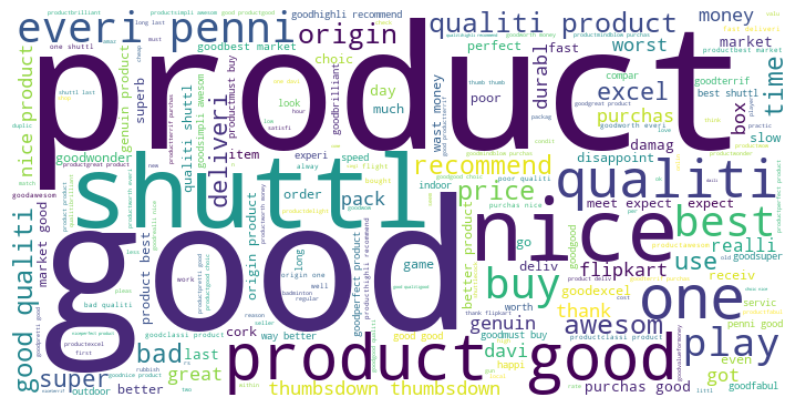

In [72]:
# Importing necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

x = ''
for i in text['clean_data']:
    x = x + i

# Create a WordCloud object
wordcloud = WordCloud(width=700, height=350, background_color='white').generate(x)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the WordCloud as an image
wordcloud.to_file("wordcloud_image.png")

# Show the plot
plt.show()



In [73]:
# building final model with 100% data
rfc_final = RandomForestClassifier(class_weight=cw)
rfc_final.fit(tfidf_df,target)

c:\Users\nishk\Desktop\Innomatics\Sentiment Analysis\env1\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight={0: 4.612466124661246,
                                     1: 2.6510903426791277,
                                     2: 0.41562881562881565})

In [74]:
def test_text(data):
    data = read_more(data)
    data = normalization(data)
    data = remove_emoji(data)
    data = remove_punctuation(data)
    data = remove_digit(data)
    data = accented_fixing(data)
    data = auto_correction(data)
    data = contraction_fixing(data)
    data = remove_stopwords(data)
    data = stemming(data)

    emo_lab = {0: 'Neutral', 1: 'Negative', 2: 'Positive'}

    trans_data=tfidf_vec.transform([data]).A
    result=rfc_final.predict(trans_data)
    return emo_lab[int(result)]
    

### **Testing the model on custom input**

In [81]:
test_text('nice product')

c:\Users\nishk\Desktop\Innomatics\Sentiment Analysis\env1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\nishk\AppData\Local\Temp\ipykernel_10892\1582477336.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return emo_lab[int(result)]


'Positive'

In [76]:
test_text('didnot like this product')

c:\Users\nishk\Desktop\Innomatics\Sentiment Analysis\env1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\nishk\AppData\Local\Temp\ipykernel_10892\1582477336.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return emo_lab[int(result)]


'Negative'

In [77]:
test_text('just ok nice')

c:\Users\nishk\Desktop\Innomatics\Sentiment Analysis\env1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\nishk\AppData\Local\Temp\ipykernel_10892\1582477336.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return emo_lab[int(result)]


'Neutral'

In [78]:
test_text('nice')

c:\Users\nishk\Desktop\Innomatics\Sentiment Analysis\env1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\nishk\AppData\Local\Temp\ipykernel_10892\1582477336.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return emo_lab[int(result)]


'Neutral'

In [82]:
import pickle

# Saving the RandomForestClassifier model
with open('rfc_final.pkl', 'wb') as f:
    pickle.dump(rfc_final, f)

# Saving the TfidfVectorizer object
with open('tfidf_vec.pkl', 'wb') as f:
    pickle.dump(tfidf_vec, f)

In [80]:
# Saving the logistic regression model
with open('lr_final.pkl', 'wb') as f:
    pickle.dump(lr_final, f)